In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('salarios_sujos.csv')
df.head()

,Nome,Salario,Nascimento,Cargo,Ano
0,MICAEL RIBEIRO AMORIM,17724.488653,1953-07-15,Estagiário,1953.0
1,MATHEUS PICANÇO SANTOS FERREIRA SILVA,2214.000000,1987-12-27,Gerente,1987.0
2,SAMUEL QUEIROZ DE AGUIAR,3837.750000,1970-12-14,Auxiliar,1970.0
3,VICTOR MUZY FERNANDES,264.183295,1966-08-01,Diretor,1966.0
4,GABRIEL RISSON EUZEBIO,1225.200000,1950-12-14,Analista,1950.0


In [9]:
# 1. Verificar valores nulos
print("=== Valores Nulos ===")
print(df.isnull().sum())
print("\n=== Percentual de Valores Nulos ===")
print((df.isnull().sum() / len(df) * 100).round(2))


=== Valores Nulos ===
Nome            0
Salario       169
Nascimento    316
Cargo         172
Ano           700
dtype: int64

=== Percentual de Valores Nulos ===
Nome          0.00
Salario       1.61
Nascimento    3.01
Cargo         1.64
Ano           6.67
dtype: float64


In [10]:

# 2. Verificar duplicatas
print("\n=== Total de Duplicatas ===")
print(df.duplicated().sum())
print(f"Percentual de duplicatas: {(df.duplicated().sum() / len(df) * 100).round(2)}%")



=== Total de Duplicatas ===
500
Percentual de duplicatas: 4.76%


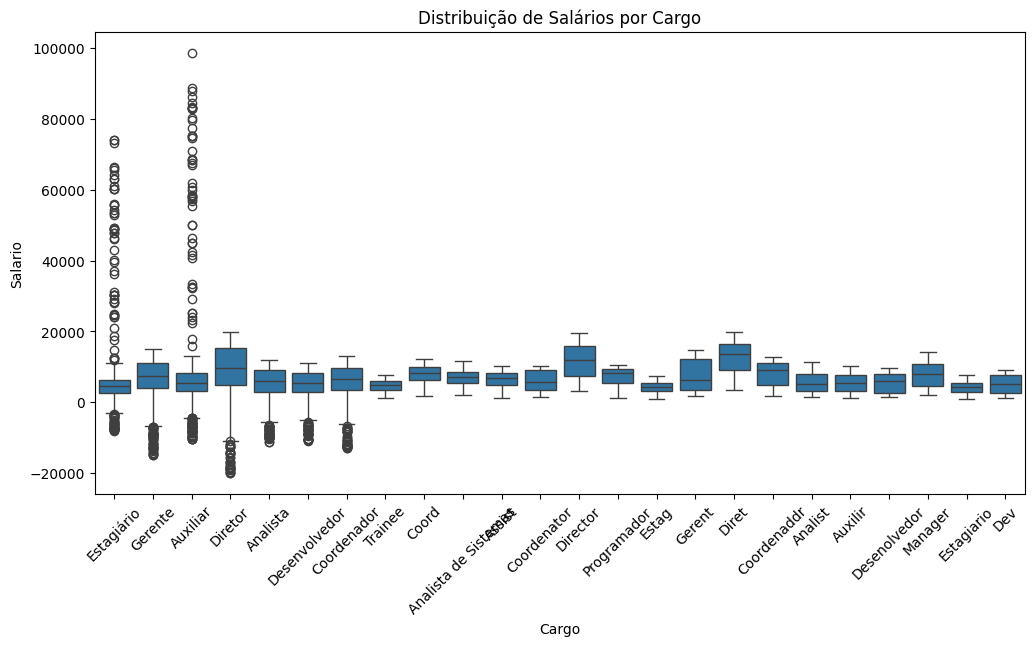

In [11]:

# 3. Análise de Salários
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cargo', y='Salario', data=df)
plt.title('Distribuição de Salários por Cargo')
plt.xticks(rotation=45)
plt.show()


In [12]:

# 4. Verificar salários negativos
print("\n=== Salários Negativos ===")
print(f"Total: {(df['Salario'] < 0).sum()}")
print("\nExemplos:")
display(df[df['Salario'] < 0].head())



=== Salários Negativos ===
Total: 484

Exemplos:


,Nome,Salario,Nascimento,Cargo,Ano
8,SAMUEL VICTOR ALVES,-3612.40,1990-08-09,Desenvolvedor,1990.0
29,KALLEBE AUGUSTO DE SOUSA FERRARI,-1364.40,1976-06-24,Analista,1976.0
76,FELIPE HUGO CAZULA PEREIRA,-9151.20,1979-11-17,Analista,1979.0
93,THIAGO GONÇALVES DONADONI,-3276.00,1991-07-21,Coordenador,1991.0
107,PEDRO DA CUNHA TEIXEIRA,-6019.65,1973-08-09,Auxiliar,1973.0


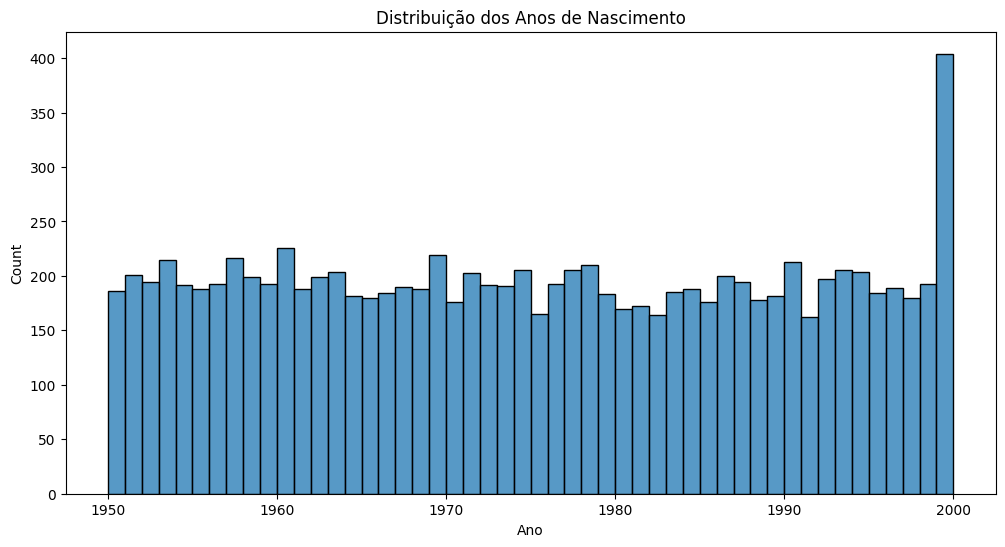

In [13]:

# 5. Análise de Datas
plt.figure(figsize=(12, 6))
df['Ano'] = pd.to_datetime(df['Nascimento'], errors='coerce').dt.year
sns.histplot(data=df, x='Ano', bins=50)
plt.title('Distribuição dos Anos de Nascimento')
plt.show()


In [14]:

# 6. Verificar datas inválidas
print("\n=== Datas Inválidas ===")
datas_invalidas = df[pd.to_datetime(df['Nascimento'], errors='coerce').isnull()]
print(f"Total: {len(datas_invalidas)}")
print("\nExemplos:")
display(datas_invalidas.head())



=== Datas Inválidas ===
Total: 700

Exemplos:


,Nome,Salario,Nascimento,Cargo,Ano
10,RÔMULO CARDOSO DINIZ,8080.00,2025-00-00,Diretor,NaN
33,LETICIA RIBAS DE MOURA,2794.05,1750-06-31,Auxiliar,NaN
37,VICTOR HUGO CAZULA PEREIRA,12183.60,1750-06-31,Coordenador,NaN
47,SAMUEL DA CUNHA TEIXEIRA,2733.00,1973-13-32,Gerente,NaN
50,PAULO PICANÇO SANTOS FERREIRA SILVA,8559.20,1750-06-31,Coordenador,NaN


In [15]:

# 7. Verificar cargos com erros de digitação
print("\n=== Variações de Cargos ===")
print(df['Cargo'].value_counts())



=== Variações de Cargos ===
Cargo
Auxiliar                1466
Diretor                 1426
Gerente                 1415
Coordenador             1412
Analista                1403
Desenvolvedor           1374
Estagiário              1365
Manager                   39
Trainee                   35
Diret                     35
Analista de Sistemas      34
Auxilir                   33
Analist                   31
Assist                    31
Gerent                    29
Coord                     26
Director                  26
Estagiario                25
Desenolvedor              25
Estag                     24
Coordenator               22
Programador               19
Dev                       18
Coordenaddr               15
Name: count, dtype: int64


In [16]:

# 8. Resumo estatístico dos salários por cargo
print("\n=== Resumo Estatístico dos Salários por Cargo ===")
display(df.groupby('Cargo')['Salario'].describe())



=== Resumo Estatístico dos Salários por Cargo ===


,count,mean,std,min,25%,50%,75%,max
Cargo,,,,,,,,
Analist,31.0,5915.419355,3310.156848,1418.40,3209.400,5149.20,7950.600,11299.200000
Analista,1373.0,5765.287154,4288.322223,-11060.40,2973.600,6104.40,9168.000,12000.000000
Analista de Sistemas,34.0,7290.211765,2779.601862,1970.40,5471.100,7251.60,8544.000,11653.200000
Assist,31.0,6525.512903,2292.031476,1340.85,5005.350,6891.15,8428.875,10235.400000
Auxiliar,1445.0,7022.349038,11408.489145,-10343.55,3161.550,5612.25,8220.450,98444.289160
Auxilir,33.0,5625.772727,2730.284252,1248.45,3136.350,5436.90,7719.600,10385.550000
Coord,26.0,7907.450000,2759.895039,1747.20,6347.900,8235.50,9866.675,12125.100000
Coordenaddr,15.0,7823.053333,3701.274147,1843.40,5038.800,9096.10,11030.500,12823.200000
Coordenador,1389.0,6160.363534,4658.540379,-12883.00,3377.400,6542.90,9718.800,12970.100000


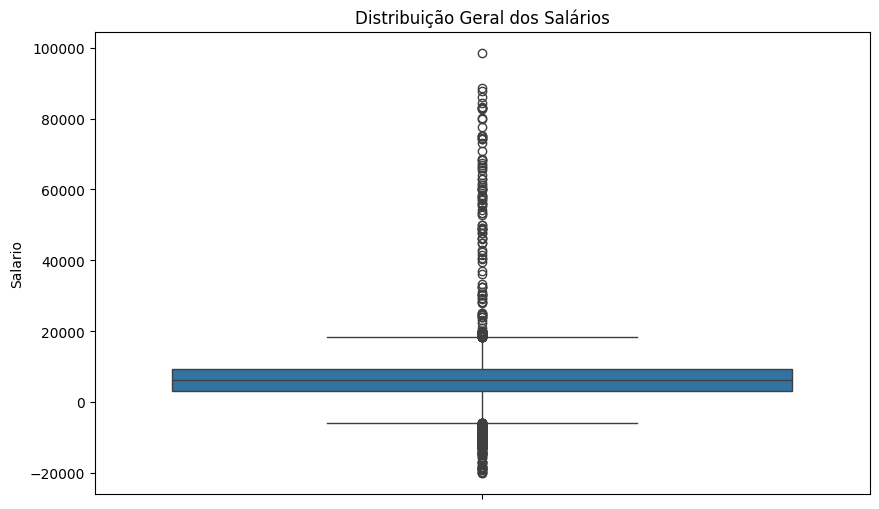

In [17]:

# 9. Boxplot para identificar outliers nos salários
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Salario'])
plt.title('Distribuição Geral dos Salários')
plt.show()


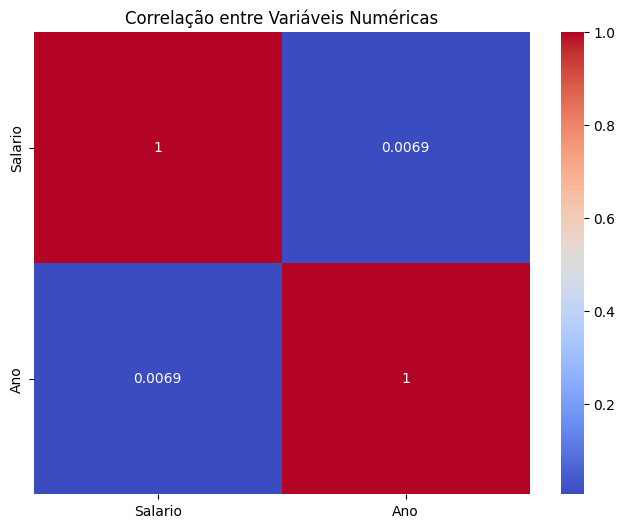

In [18]:

# 10. Heatmap de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()
